# Computer Vision with Deep Learning Basics

In this notebook, we will try several deep learning basics. Hopefully you can learn how computer vision models are usually operated. This notebook was made based on TorchVision official tutorial [here](https://pytorch.org/vision/stable/models.html#general-information-on-pre-trained-weights).

Note that here is the typical workflow when running a model.

`pre-process -> inference -> post-process`

First, import related modules from TorchVision

In [ ]:
import time
from torchvision.models import vit_l_16, vgg19, vit_h_14, ViT_L_16_Weights, VGG19_Weights, ViT_H_14_Weights

The first step is initializing the model. When using pre-trained model from TorchVision, you can do it the following way

In [ ]:
model_weight = ViT_H_14_Weights.IMAGENET1K_SWAG_E2E_V1
model = vit_h_14(weights=model_weight)
model = model.eval()

Downloading: "https://download.pytorch.org/models/vit_h_14_swag-80465313.pth" to /root/.cache/torch/hub/checkpoints/vit_h_14_swag-80465313.pth
100%|██████████| 2.36G/2.36G [00:24<00:00, 101MB/s]


In the output terminal you will see that the module downloads a model weight file, formatted as `.pth` (or `.pt`).

You can check the model architecture like below

In [ ]:
print(model)

VisionTransformer(
  (conv_proj): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=1280, out_features=1280, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=1280, out_features=5120, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=5120, out_features=1280, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
       

Now we already have the model. The preprocessing step for this also has been provided in TorchVision.

In [ ]:
preprocess = model_weight.DEFAULT.transforms()
print(preprocess.__module__)
print(preprocess.__class__)

torchvision.transforms._presets
<class 'torchvision.transforms._presets.ImageClassification'>


The source code for the preprocessing can be seen in the class script [here](https://github.com/pytorch/vision/blob/526ec93e0e1119b5f1f0ee257818394a28854199/torchvision/transforms/_presets.py#L57).

You can see that the steps are

`resize -> crop the center -> convert to torch tensor -> convert data type to float -> normalize pixel using mean and std`

Note that the output tensor will have shape (C, H ,W)

Let's try!

Preprocessed image shape: torch.Size([3, 518, 518])


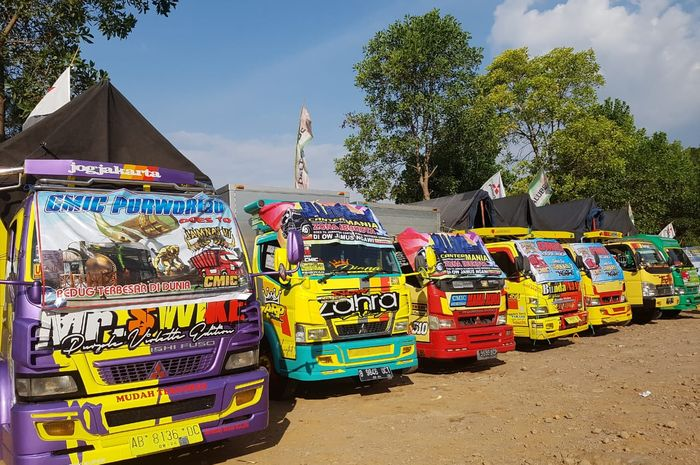

In [ ]:
from PIL import Image

# change the image path
img = Image.open("truk-indo.jpeg")
preprocessed_img = preprocess(img)
print("Preprocessed image shape:", preprocessed_img.shape)
display(img)


In [ ]:
# Run! The model can only accept input with 4D: Batch, Channel, Height, Width
start_time = time.time()
result = model(preprocessed_img.unsqueeze(0))
print("Inference time:", time.time() - start_time, "seconds")

Inference time: 22.400507926940918 seconds


Let's see the results

In [ ]:
print("Results shape:", result.shape)

Results shape: torch.Size([1, 1000])


In [ ]:
print(result)

tensor([[ 1.7186e-01, -3.6729e-02,  1.2596e-01,  1.4387e-01, -2.9435e-01,
         -3.4495e-02, -8.1037e-01,  6.5425e-01,  7.1881e-01,  5.8706e-01,
          1.0566e-01, -8.3330e-02, -4.2913e-02, -3.6706e-01,  1.1788e-01,
         -4.6993e-01, -7.3834e-01, -3.0058e-01, -7.2774e-01, -3.8871e-01,
          1.2236e-01, -6.2343e-02, -3.3988e-01, -7.1961e-01, -8.8474e-01,
         -8.1317e-01,  3.9011e-01,  8.3038e-02, -6.9314e-01, -3.4915e-01,
         -7.1265e-01, -7.9134e-01, -4.7258e-01, -6.3104e-01, -1.1974e+00,
         -3.6147e-01, -1.0505e-01, -7.7133e-01, -3.9084e-03, -1.4017e+00,
         -5.4545e-01, -2.8629e-01, -5.4144e-01, -1.3150e-01,  1.2136e-01,
         -4.9477e-02, -6.3365e-01, -8.4216e-01,  8.0944e-02, -7.3221e-01,
         -1.3377e+00,  2.5912e-01,  4.1607e-01,  1.9325e-01, -5.6394e-01,
         -2.7669e-01, -4.6579e-01, -2.2600e-01,  3.2612e-01, -2.0305e-01,
         -5.7931e-01, -3.8153e-01,  4.2347e-01, -9.0337e-01, -1.6520e-01,
          4.9475e-02,  1.5054e-01, -4.

The direct output of the model is usually not directly interpretable. The results that you see there are the softmax output of each class in Imagenet. Thus, we need to do some post-processing to get meaningfull result.

1. Get the class number that has maximum softmax
2. Find out the class name

In [ ]:
print("Class list: ", model_weight.meta["categories"])

Class list:  ['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea snake', 'horned viper', 'd

In [ ]:
class_num = result.argmax()
class_name = model_weight.meta["categories"][result.argmax()]
print("Class number of the classification result:", class_num)
print("The name for the class is:", class_name)

Class number of the classification result: tensor(867)
The name for the class is: trailer truck
